# Assignment 1
## Submitted by : S. Bhuvanesh
## Roll No : 2018113002

In [4]:
#Importing needed libraries:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

### Function for the Logistic map:

In [5]:
def f(x,a):
    return a*(x)*(1-x)

### Plotting $f^n(x)$

In [52]:
def plotfun(n,prec,alpha):
    y=[]
    x=np.arange(0,1,1/prec)
    for i in x:
        temp = i
        for j in range(n):
            temp=f(temp,alpha)
        y=np.append(y,temp)
    plt.plot([0,1],[0,1])
    plt.plot(x,y)
    plt.title(r"Plotting $f^n(x)$")
    plt.ylabel(r"$f^n(x)$")
    
            

<IPython.core.display.Javascript object>


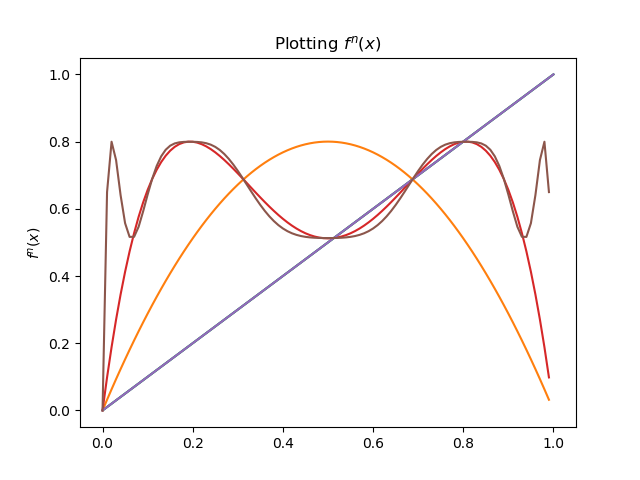

In [53]:
plotfun(1,100,3.2)
plotfun(2,100,3.2)
plotfun(4,100,3.2)


## Plotting the Logistical Map:

## Q1 : Plotting $x_i$ vs $i$

In [43]:
def plotlog(alpha,start,it):
    y=[start]
    for i in range(it-1):
        y=np.append(y,f(y[-1],alpha))
    plt.plot(range(it),y)
    plt.title("Logistical Map")
    plt.xlabel(r"$i$")
    plt.ylabel(r"$x_i$")
#    print("The Last 4 values are:")
#    for i in range(1,5):
#        print(y[-i])

<IPython.core.display.Javascript object>


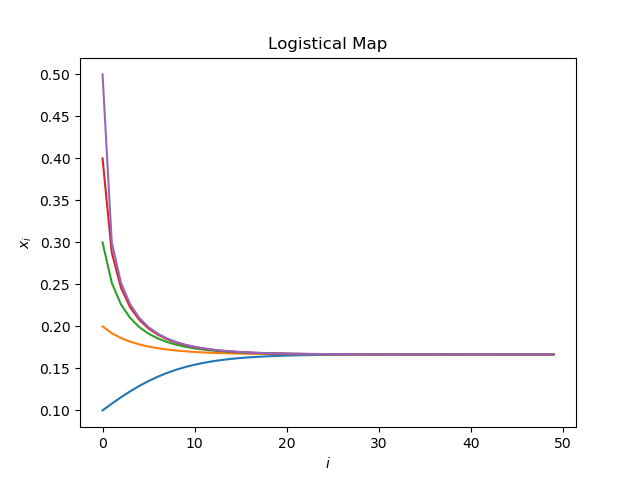

In [44]:
#ploting for different values of starting x0
#Tweak Alpha here:
alpha = 1.2
for i in range(1,6):
    plotlog(alpha,i/10,50)


<IPython.core.display.Javascript object>


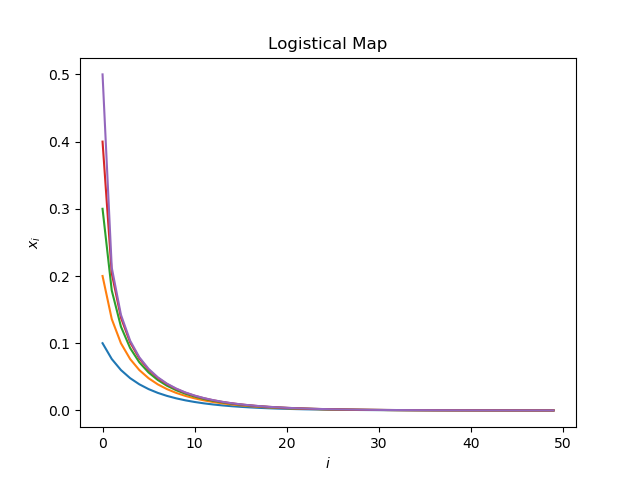

In [45]:
alpha = 0.85
for i in range(1,6):
    plotlog(alpha,i/10,50)

<IPython.core.display.Javascript object>


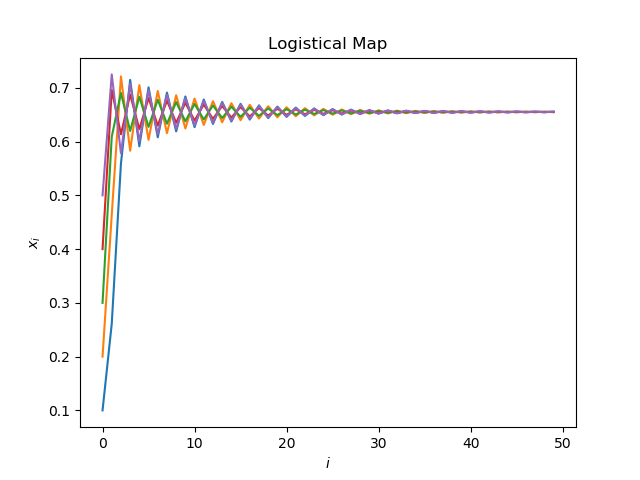

In [46]:
alpha = 2.9
for i in range(1,6):
    plotlog(alpha,i/10,50)

<IPython.core.display.Javascript object>


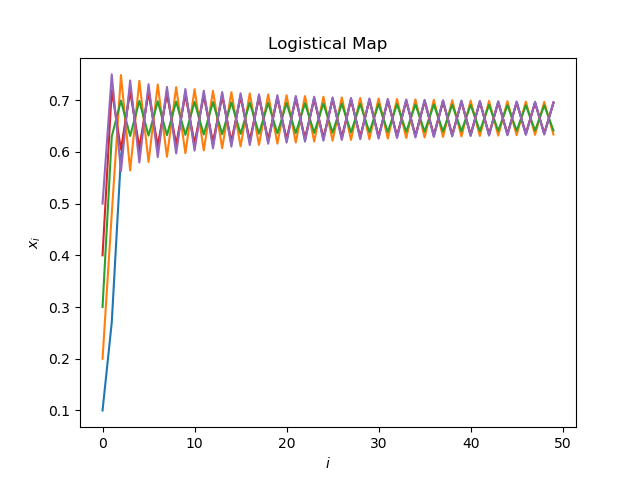

In [47]:
alpha = 3.0
for i in range(1,6):
    plotlog(alpha,i/10,50)

<IPython.core.display.Javascript object>


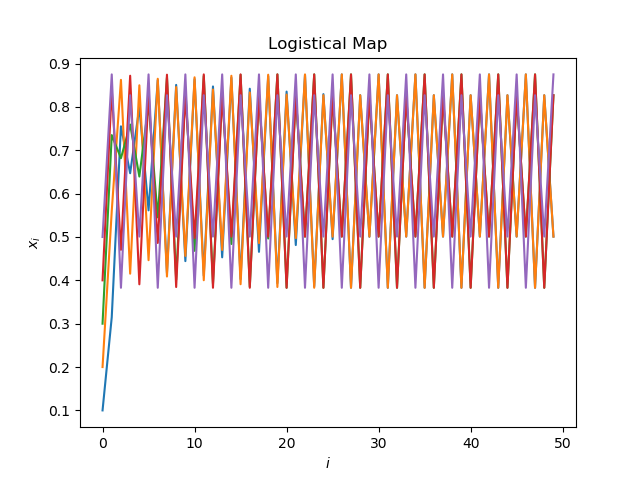

In [48]:
alpha = 3.5
for i in range(1,6):
    plotlog(alpha,i/10,50)

<IPython.core.display.Javascript object>


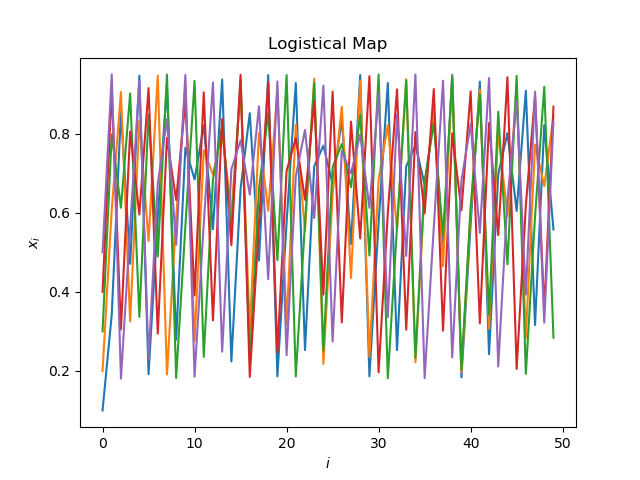

In [49]:
alpha = 3.8
for i in range(1,6):
    plotlog(alpha,i/10,50)

### We observe the following :

#### For $\alpha$ 0 to 1 , we reach the steady state of 0
#### For $\alpha$ 1 to 3.0 , we reach a non zero steady state.
#### For $\alpha$ 3.0 and onwards we observe $n-cycles$ through which the value oscillates
#### For $\alpha$ beyond $\approx$ 3.56995 we see a chaotic behavior and no apparent cyclic pattern is generally observed.

### Code to visualize the stability or unstabilty of roots of $f^n(x)$

In [14]:
def checkstable(slope,start):
    def g(x):
        return slope*x
    plt.plot([-1,1],[-1,1])
    plt.plot([-1,1],[g(-1),g(1)])
    temp=start
    for i in range(10):
        plt.plot([temp,g(temp)],[g(temp),g(temp)],'r')
        temp=g(temp)
        plt.plot([temp,temp],[temp,g(temp)],'r')

    

<IPython.core.display.Javascript object>


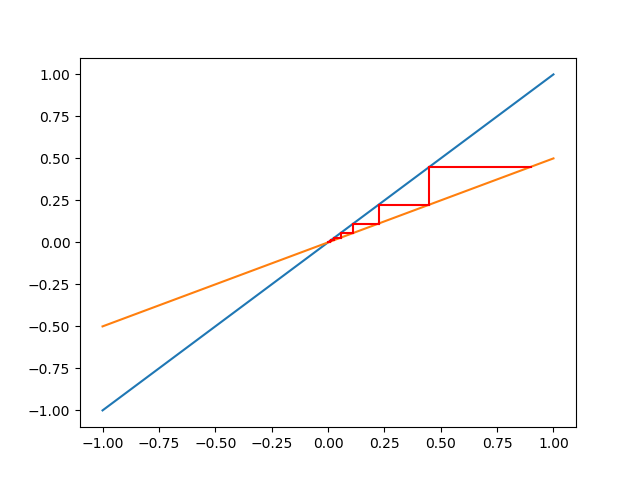

In [15]:
#|Slope| < 1 : 
checkstable(0.5,0.9)


#It is Stable.

<IPython.core.display.Javascript object>


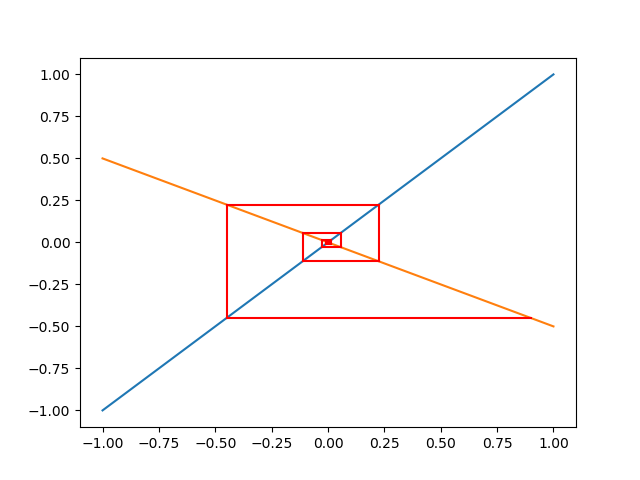

In [16]:
checkstable(-0.5,0.9)
#It is stable

<IPython.core.display.Javascript object>


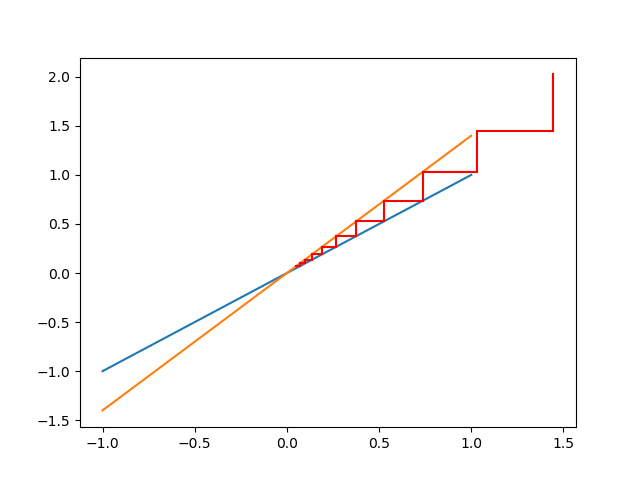

In [17]:
#Slope > 1
checkstable(1.4,0.05)

<IPython.core.display.Javascript object>


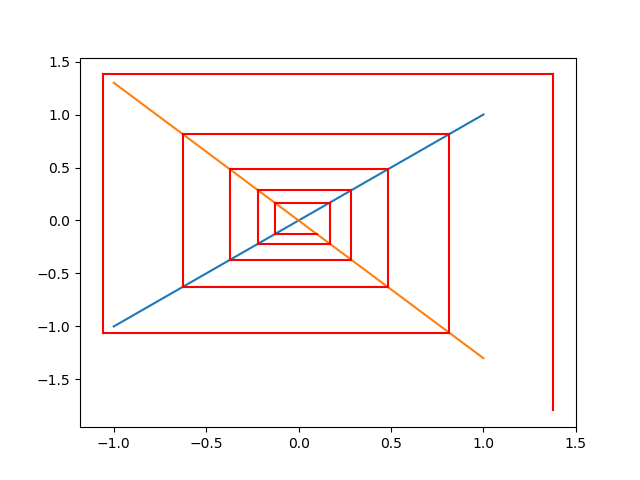

In [18]:
checkstable(-1.3,0.1)
#It is Unstable

## Q2: Finding number of stable states for a given alpha:
#### We can accomplish this by, making an array of i vs $x_i$ and find repeating elements after a large number of iterations.

In [6]:
xaxis=[]
yaxis=[]
def calcxi(alpha,start,it): #Makes an array for the xi for a particular alpha and starting value from 1 to  i = it
    y=[start]
    for i in range(it-1):
        y=np.append(y,f(y[-1],alpha))
    return y

def isclose(a,b,delta):
    return abs(a-b) < delta

def pts4a(a):#Adds the stable states/ Cycle points for a particular alpha to the data set for the scatter plot
    global xaxis 
    global yaxis
    y = calcxi(a,0.5,1000)
    i=-2
    while not isclose(y[-1],y[i],0.00001):
        if i==-100:
            break
        i-=1
    for j in range(i,-1):
        xaxis=np.append( xaxis,a)
        yaxis=np.append( yaxis,y[j])

        
alpha = np.arange(0,4.0,0.0005)

for k in alpha: #Plots for different values of alpha
    pts4a(k)

<IPython.core.display.Javascript object>


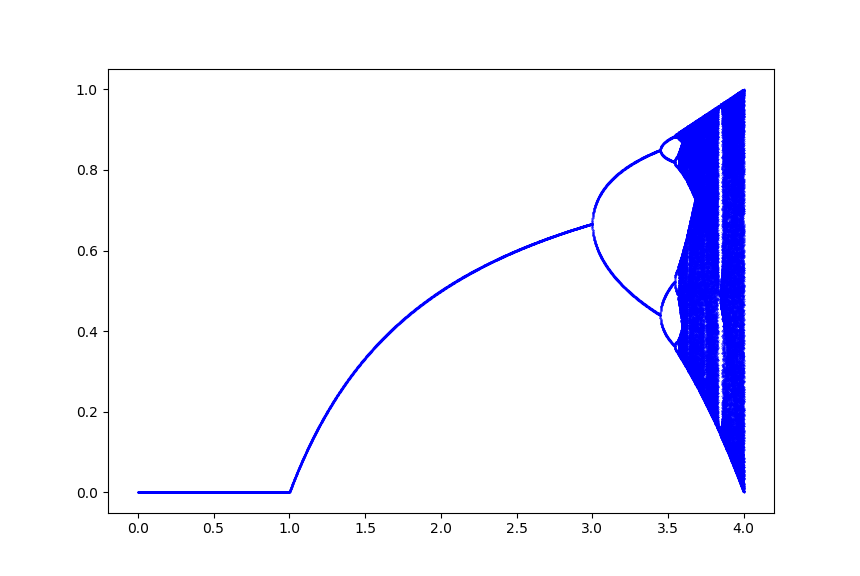

In [42]:
plt.scatter(xaxis,yaxis,s=0.1,c='b')

<IPython.core.display.Javascript object>


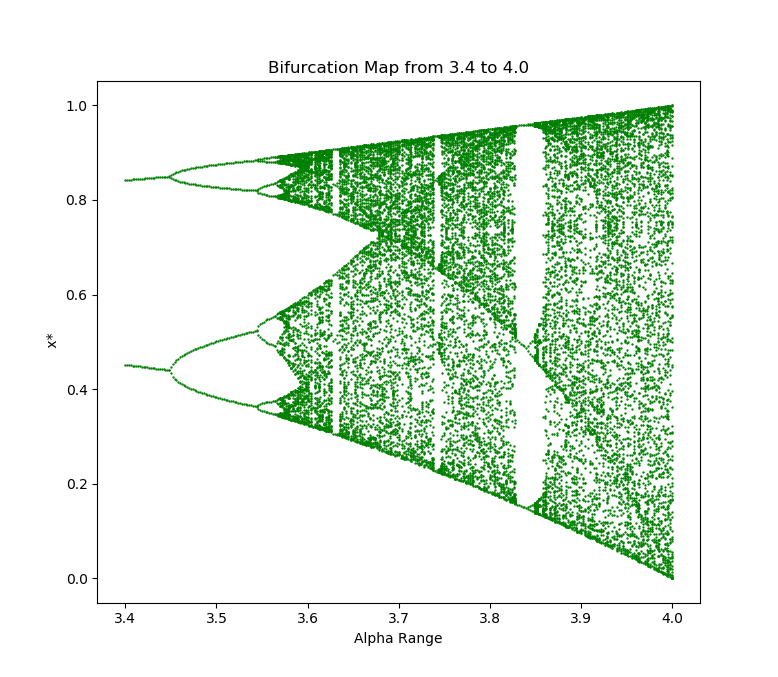

Text(0, 0.5, ' x*')

In [40]:
xaxis = []
yaxis = []
#Focussing on 3.4 till 4
alpha = np.arange(3.4,4.0,0.002)
for k in alpha:
    pts4a(k)
plt.scatter(xaxis,yaxis,s=0.5,c='g')
plt.title("Bifurcation Map from 3.4 to 4.0")
plt.xlabel("Alpha Range")
plt.ylabel(" x*")

#### We see from the bifurcation map that the function behaves highly chaotic behavior beyond $\alpha \approx 3.59 $ 
#### But still there are some ranges where there seems that the function falls in stable loops again for example, at $\alpha \approx 3.83 $ we see cycles of 3 members.

## Q3 a: Finding $ \Delta / \epsilon $ for different $ \alpha $

In [35]:
#Let the starting point be 0.5 for all our calculations
x0 = 0.5
epsilon = 0.001

#Since the behaviour of the logistic map is predictable till 3.6 , we will plot from 3.5 to 4.0
def plotdeltabyepsilon(x0,epsilon):
    yaxis2=[]
    alpha_array = np.arange(3.5,4.0, 0.001)
    for i in alpha_array:
        xi_array1 = calcxi(i,x0,100)
        xi_array2 = calcxi(i,x0+epsilon,100)
        delta = xi_array1[-1] - xi_array2[-1]
        #print("For Alpha ", i , " start = ", x0 , "value = ", xi_array1[-1])
        yaxis2 = np.append(yaxis2,delta)
    plt.scatter(alpha_array,yaxis2,s=5,marker='*',c='b')
    plt.xlabel("Alpha Range")
    plt.ylabel("Delta")
    plt.show()

<IPython.core.display.Javascript object>


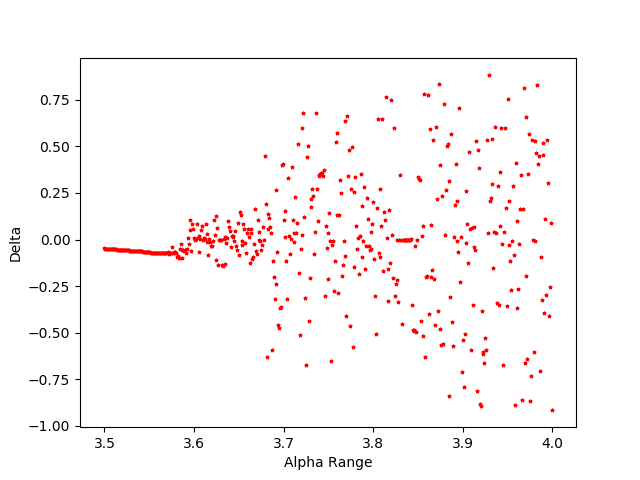

In [31]:
plotdeltabyepsilon(0.5,0.1) #epsilon = 0.1

<IPython.core.display.Javascript object>


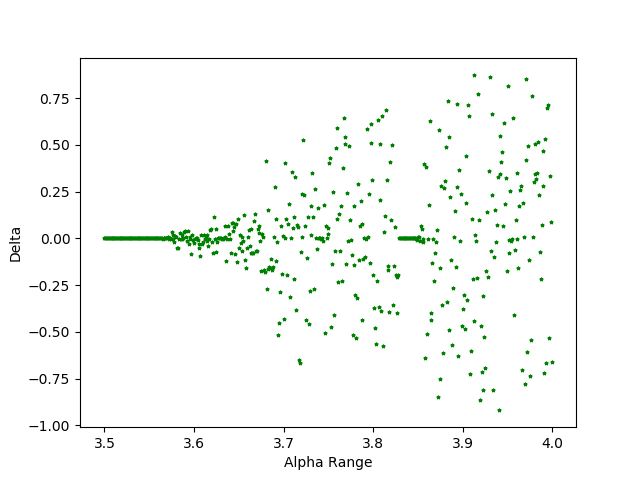

In [34]:
plotdeltabyepsilon(0.5,0.01) #epsilon = 0.01

<IPython.core.display.Javascript object>


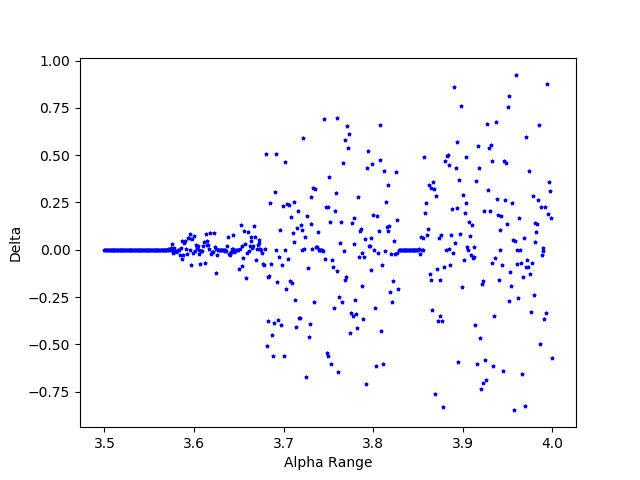

In [36]:
plotdeltabyepsilon(0.5,0.001) #epsilon = 0.001

## Q 3 b: Plotting $ \Delta / \epsilon $ for varying $ \epsilon $ and constant $ \alpha $

In [37]:
alpha = 3.9
st = 0.5
it = 100
def varyepsilon(alpha,st,it) :
    #varying epsilon from 0.01 to 0.1
    xaxis_varyepsilon = np.arange(0 , 0.1 , 0.001)
    yaxis_varyepsilon = []
    tempnew1 = calcxi(alpha,st,it)
    for i in xaxis_varyepsilon:
        tempnew2 = calcxi(alpha,st+i,it)
        yaxis_varyepsilon = np.append(yaxis_varyepsilon,tempnew2[-1] - tempnew1[-1])
    plt.plot(xaxis_varyepsilon,yaxis_varyepsilon,linewidth=1)
    plt.xlabel("Epsilon")
    plt.ylabel("Delta for a Particular Alpha and Delta")
        

<IPython.core.display.Javascript object>


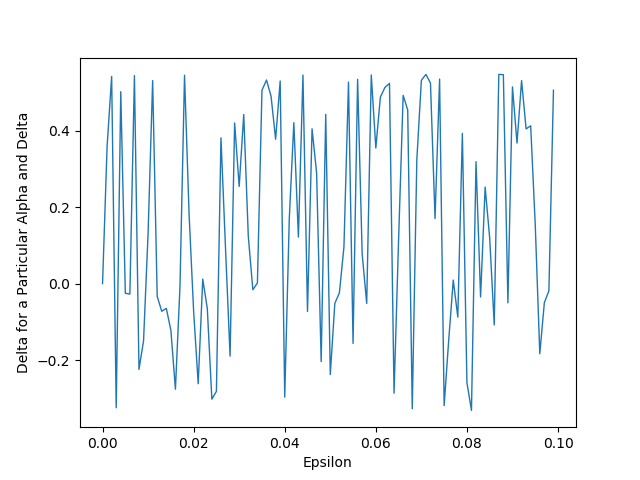

In [38]:
varyepsilon(3.9,0.5,100)

In [20]:
def histmaker(alpha,start,it,bins) :
    plt.hist(calcxi(alpha,start,it),bins)
    plt.show()

<IPython.core.display.Javascript object>


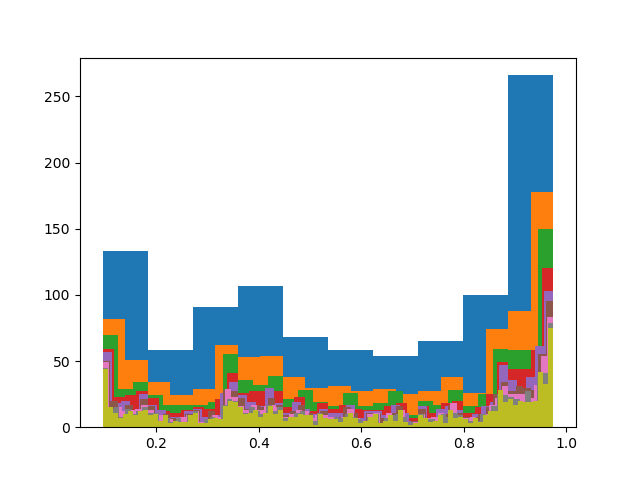

In [23]:
for i in range(10,100,10):
    histmaker(3.9,0.5,1000,i)